In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read CSV files into dataframes

In [214]:
# Read CSV files into dataframes

df_pesticides = pd.read_csv("/Users/alexanderdelriscomorales/Downloads/AI_ML_Files/pesticides.csv")
df_rainfall = pd.read_csv("/Users/alexanderdelriscomorales/Downloads/AI_ML_Files/rainfall.csv")
df_temp = pd.read_csv("/Users/alexanderdelriscomorales/Downloads/AI_ML_Files/temp.csv")
df_yield = pd.read_csv("/Users/alexanderdelriscomorales/Downloads/AI_ML_Files/yield.csv")

In [215]:
def check_variables(df: pd.DataFrame):
  cols = df.columns
  quantitative_cols = df._get_numeric_data().columns
  categorical_cols = list(set(cols) - set(quantitative_cols))
  return categorical_cols, list(set(quantitative_cols))

# DATASET pesticides

In [216]:
#DATASET pesticides
df_pesticides.info(show_counts=True)
print(df_pesticides.shape)
display(df_pesticides.head(n=10))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   4349 non-null   object 
 1   Area     4349 non-null   object 
 2   Element  4349 non-null   object 
 3   Item     4349 non-null   object 
 4   Year     4349 non-null   int64  
 5   Unit     4349 non-null   object 
 6   Value    4349 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 238.0+ KB
(4349, 7)


,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.00
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.00
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.00
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.00
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.00
5,Pesticides Use,Albania,Use,Pesticides (total),1995,tonnes of active ingredients,251.00
6,Pesticides Use,Albania,Use,Pesticides (total),1996,tonnes of active ingredients,313.96
7,Pesticides Use,Albania,Use,Pesticides (total),1997,tonnes of active ingredients,376.93
8,Pesticides Use,Albania,Use,Pesticides (total),1998,tonnes of active ingredients,439.89
9,Pesticides Use,Albania,Use,Pesticides (total),1999,tonnes of active ingredients,502.86


>## Rename Columns

In [217]:
# Rename Columns
df_pesticides.rename(columns={'Area':'Country', 'Value':'pesticides_tonnes'}, inplace=True)
display(df_pesticides.head(n=10))

,Domain,Country,Element,Item,Year,Unit,pesticides_tonnes
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.00
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.00
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.00
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.00
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.00
5,Pesticides Use,Albania,Use,Pesticides (total),1995,tonnes of active ingredients,251.00
6,Pesticides Use,Albania,Use,Pesticides (total),1996,tonnes of active ingredients,313.96
7,Pesticides Use,Albania,Use,Pesticides (total),1997,tonnes of active ingredients,376.93
8,Pesticides Use,Albania,Use,Pesticides (total),1998,tonnes of active ingredients,439.89
9,Pesticides Use,Albania,Use,Pesticides (total),1999,tonnes of active ingredients,502.86


>## Categorical columns
>## Quantitative columns

In [218]:
cat_cols, quan_cols = check_variables(df_pesticides)
print(f'categorical columns: {cat_cols}')
print(f'quantitative columns: {quan_cols}')

categorical columns: ['Country', 'Unit', 'Domain', 'Item', 'Element']
quantitative columns: ['pesticides_tonnes', 'Year']


In [219]:
categorical_cols = ['Country', 'Unit', 'Domain', 'Item', 'Element']
for col in categorical_cols:
    print(f"Column: {col} : {df_pesticides[col].nunique()} sublevels")
    print(df_pesticides[col].value_counts())
    print("\n")

Column: Country : 168 sublevels
Country
Albania               27
Mexico                27
Mozambique            27
Myanmar               27
Namibia               27
                      ..
Montenegro            11
Belgium-Luxembourg    10
Sudan                  5
USSR                   2
Yugoslav SFR           2
Name: count, Length: 168, dtype: int64


Column: Unit : 1 sublevels
Unit
tonnes of active ingredients    4349
Name: count, dtype: int64


Column: Domain : 1 sublevels
Domain
Pesticides Use    4349
Name: count, dtype: int64


Column: Item : 1 sublevels
Item
Pesticides (total)    4349
Name: count, dtype: int64


Column: Element : 1 sublevels
Element
Use    4349
Name: count, dtype: int64




># Drop Columns

In [220]:
df_pesticides.drop(['Unit', 'Domain', 'Item', 'Element'], axis='columns', inplace=True)
display(df_pesticides.head(n=10))

,Country,Year,pesticides_tonnes
0,Albania,1990,121.00
1,Albania,1991,121.00
2,Albania,1992,121.00
3,Albania,1993,121.00
4,Albania,1994,201.00
5,Albania,1995,251.00
6,Albania,1996,313.96
7,Albania,1997,376.93
8,Albania,1998,439.89
9,Albania,1999,502.86


# DATASET Rainfall

In [221]:
#DATASET Rainfall
df_rainfall.info(show_counts=True)
print(df_rainfall.shape)
display(df_rainfall.head(n=10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB
(6727, 3)


,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327
5,Afghanistan,1991,327
6,Afghanistan,1992,327
7,Afghanistan,1993,327
8,Afghanistan,1994,327
9,Afghanistan,1995,327


># Rename Columns

In [222]:
df_rainfall.rename(columns={' Area':'Country'}, inplace=True)
display(df_rainfall.head(n=10))


,Country,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327
5,Afghanistan,1991,327
6,Afghanistan,1992,327
7,Afghanistan,1993,327
8,Afghanistan,1994,327
9,Afghanistan,1995,327


>># Convert to object to float

In [223]:
# Convert to object to float
df_rainfall['average_rain_fall_mm_per_year'].replace('..', np.nan, inplace=True)
df_rainfall['average_rain_fall_mm_per_year'] = df_rainfall['average_rain_fall_mm_per_year'].astype(float)
df_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


# DATASET Temperature

In [224]:
#DATASET Temperature
df_temp.info(show_counts=True)
print(df_temp.shape)
display(df_temp.head(n=10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB
(71311, 3)


,Year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN
5,1854,Côte D'Ivoire,NaN
6,1855,Côte D'Ivoire,NaN
7,1856,Côte D'Ivoire,26.28
8,1857,Côte D'Ivoire,25.17
9,1858,Côte D'Ivoire,25.49


># Replace Column country by Country

In [225]:
# Replace Column country by Country
df_temp.rename(columns={'country':'Country'}, inplace=True)

# DATASET Yield

In [226]:
#DATASET Yield
df_yield.info(show_counts=True)
print(df_yield.shape)
display(df_yield.head(n=10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   Year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB
(56717, 12)


,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400
5,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1966,1966,hg/ha,14400
6,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1967,1967,hg/ha,14144
7,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1968,1968,hg/ha,17064
8,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1969,1969,hg/ha,17177
9,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1970,1970,hg/ha,14757


># Rename Columns    

In [227]:
df_yield.rename(columns={'Area':'Country', 'Value':'hg/ha_Value'}, inplace=True)
display(df_yield.head(n=10))

,Domain Code,Domain,Area Code,Country,Element Code,Element,Item Code,Item,Year Code,Year,Unit,hg/ha_Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400
5,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1966,1966,hg/ha,14400
6,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1967,1967,hg/ha,14144
7,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1968,1968,hg/ha,17064
8,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1969,1969,hg/ha,17177
9,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1970,1970,hg/ha,14757


>>## categorical columns
>>## quantitative columns 

In [228]:
cat_cols, quan_cols = check_variables(df_yield)
print(f'categorical columns: {cat_cols}')
print(f'quantitative columns: {quan_cols}')

categorical columns: ['Item', 'Unit', 'Country', 'Domain', 'Domain Code', 'Element']
quantitative columns: ['hg/ha_Value', 'Year', 'Item Code', 'Element Code', 'Year Code', 'Area Code']


In [229]:
categorical_cols = ['Item', 'Unit', 'Country', 'Domain', 'Domain Code', 'Element']
for col in categorical_cols:
    print(f"Column: {col} : {df_yield[col].nunique()} sublevels")
    print(df_yield[col].value_counts())
    print("\n")

Column: Item : 10 sublevels
Item
Maize                   8631
Potatoes                7876
Rice, paddy             6469
Sweet potatoes          6356
Wheat                   6160
Cassava                 5718
Sorghum                 5511
Soybeans                4192
Yams                    3150
Plantains and others    2654
Name: count, dtype: int64


Column: Unit : 1 sublevels
Unit
hg/ha    56717
Name: count, dtype: int64


Column: Country : 212 sublevels
Country
United Republic of Tanzania           560
Democratic Republic of the Congo      560
Nigeria                               560
Venezuela (Bolivarian Republic of)    532
Cameroon                              528
                                     ... 
Estonia                                50
Djibouti                               36
Sudan                                  35
Montenegro                             33
South Sudan                            20
Name: count, Length: 212, dtype: int64


Column: Domain : 1 sublevels
Do

In [230]:
df_yield.drop(['Unit','Domain','Domain Code','Year Code','Element Code'], axis='columns', inplace=True)

display(df_yield.head(n=10))

,Area Code,Country,Element,Item Code,Item,Year,hg/ha_Value
0,2,Afghanistan,Yield,56,Maize,1961,14000
1,2,Afghanistan,Yield,56,Maize,1962,14000
2,2,Afghanistan,Yield,56,Maize,1963,14260
3,2,Afghanistan,Yield,56,Maize,1964,14257
4,2,Afghanistan,Yield,56,Maize,1965,14400
5,2,Afghanistan,Yield,56,Maize,1966,14400
6,2,Afghanistan,Yield,56,Maize,1967,14144
7,2,Afghanistan,Yield,56,Maize,1968,17064
8,2,Afghanistan,Yield,56,Maize,1969,17177
9,2,Afghanistan,Yield,56,Maize,1970,14757


# Merge dataframes

In [231]:
# # Merge dataframes
merged_df = df_pesticides.merge(df_rainfall, on=['Year', 'Country'])
merged_df = merged_df.merge(df_temp, on=['Year', 'Country'])
merged_df = merged_df.merge(df_yield, on=['Year', 'Country'])
merged_df.to_csv("/Users/alexanderdelriscomorales/Downloads/AI_ML_Files/merged_file.csv", index=False)


In [245]:
merged_df.dtypes

Country                           object
Year                               int64
pesticides_tonnes                float64
average_rain_fall_mm_per_year    float64
avg_temp                         float64
Area Code                          int64
Element                           object
Item Code                          int64
Item                              object
hg/ha_Value                        int64
dtype: object

# EXPLORATORY DATA ANALYSIS

>>## Quantitative Values

In [252]:
display(merged_df.describe())

,Year,pesticides_tonnes,average_rain_fall_mm_per_year,avg_temp,Area Code,Item Code,hg/ha_Value
count,28248.000000,28248.000000,28242.00000,28248.000000,28248.000000,28248.000000,28248.000000
mean,2001.541950,37069.136973,1149.05598,20.543722,107.259594,102.156684,77047.863282
std,7.052997,59954.787836,709.81215,6.311828,64.992914,84.842899,84950.194454
min,1990.000000,0.040000,51.00000,1.300000,1.000000,15.000000,50.000000
25%,1995.000000,1695.710000,593.00000,16.710000,56.000000,27.000000,19918.750000
50%,2001.000000,17517.760000,1083.00000,21.510000,100.000000,83.000000,38295.000000
75%,2008.000000,48687.880000,1668.00000,26.000000,157.000000,122.000000,104598.250000
max,2013.000000,367778.000000,3240.00000,30.650000,276.000000,489.000000,501412.000000


In [234]:
cat_cols, quan_cols = check_variables(merged_df)
print(f'categorical columns: {cat_cols}')
print(f'quantitative columns: {quan_cols}')

categorical columns: ['Country', 'Item', 'Element']
quantitative columns: ['hg/ha_Value', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'Year', 'Item Code', 'avg_temp', 'Area Code']


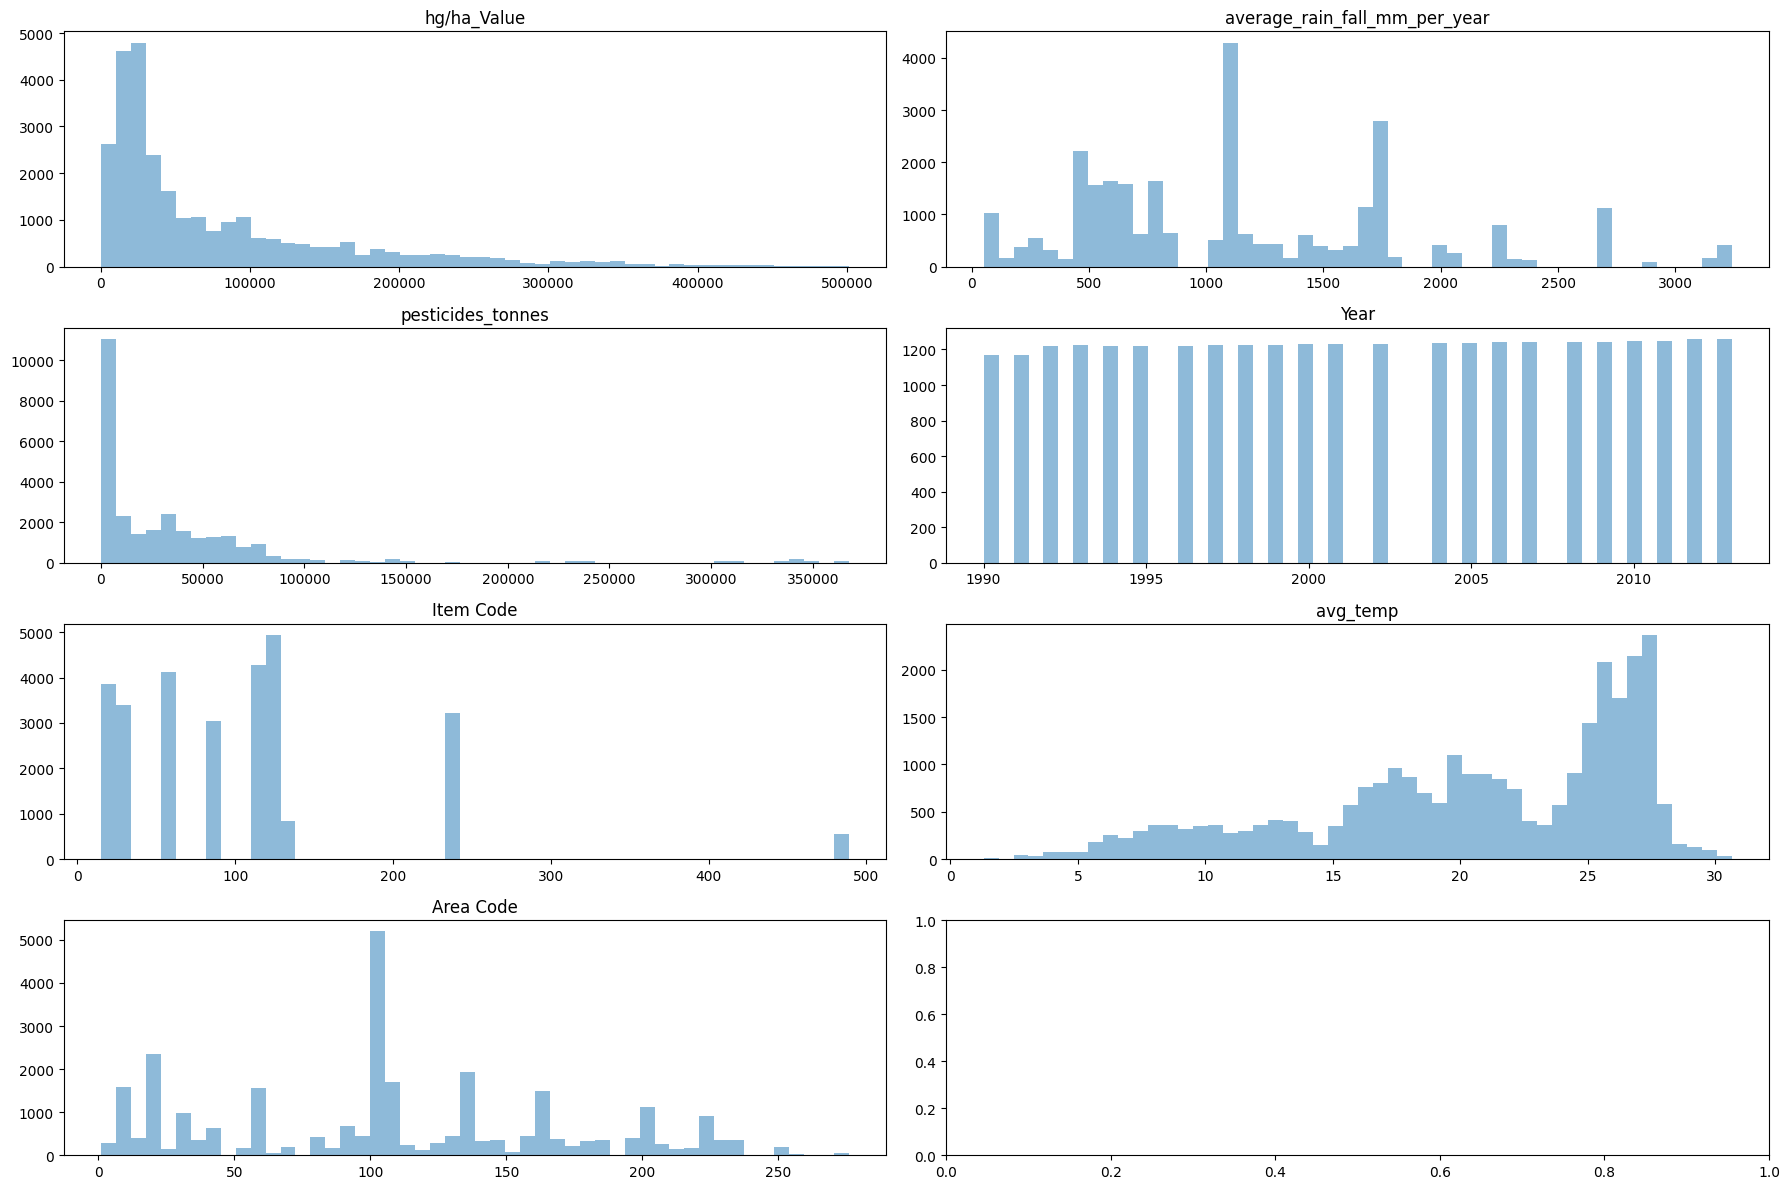

In [247]:
# Select quantitative variables
quan_cols = ['hg/ha_Value', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'Year', 'Item Code', 'avg_temp', 'Area Code']

# Plot histograms
fig, axs = plt.subplots(4, 2, figsize=(18, 12))
axs = axs.ravel()

for i, col in enumerate(quan_cols):
    axs[i].hist(merged_df[col].dropna(), bins=50, alpha=0.5)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

In [248]:
# Select the quantitative columns
quan_cols = ['hg/ha_Value', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'Year', 'Item Code', 'avg_temp', 'Area Code']

# Calculate the mean, median, and mode for each column
for col in quan_cols:
    mean = merged_df[col].mean()
    median = merged_df[col].median()
    mode = merged_df[col].mode()[0]
    print(f"Column: {col}")
    print(f"Mean: {mean:.2f}")
    print(f"Median: {median:.2f}")
    print(f"Mode: {mode:.2f}")
    print("")

Column: hg/ha_Value
Mean: 77047.86
Median: 38295.00
Mode: 10000.00

Column: average_rain_fall_mm_per_year
Mean: 1149.06
Median: 1083.00
Mode: 1083.00

Column: pesticides_tonnes
Mean: 37069.14
Median: 17517.76
Mode: 1597.00

Column: Year
Mean: 2001.54
Median: 2001.00
Mode: 2012.00

Column: Item Code
Mean: 102.16
Median: 83.00
Mode: 116.00

Column: avg_temp
Mean: 20.54
Median: 21.51
Mode: 27.20

Column: Area Code
Mean: 107.26
Median: 100.00
Mode: 100.00



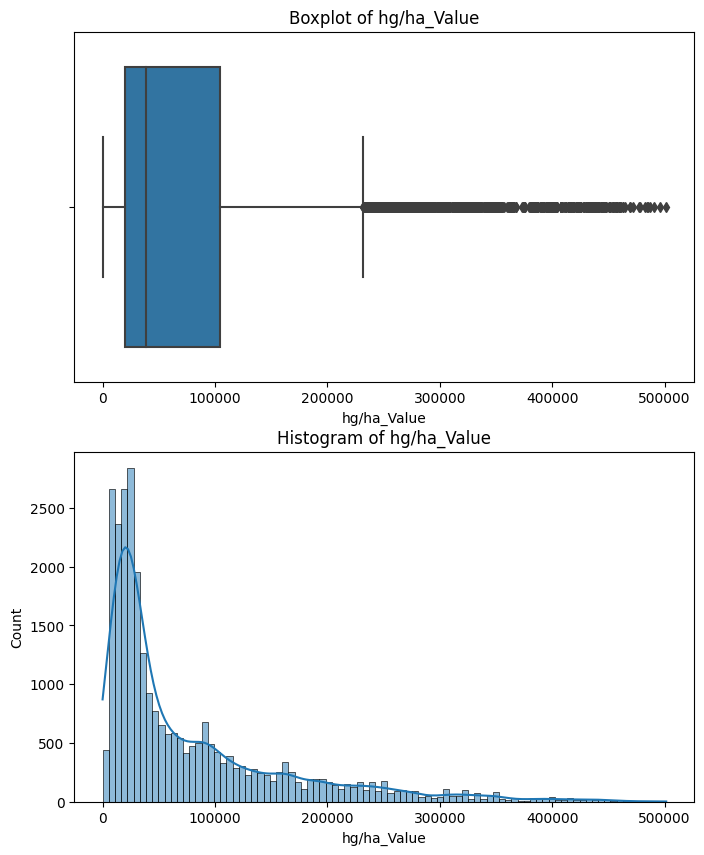

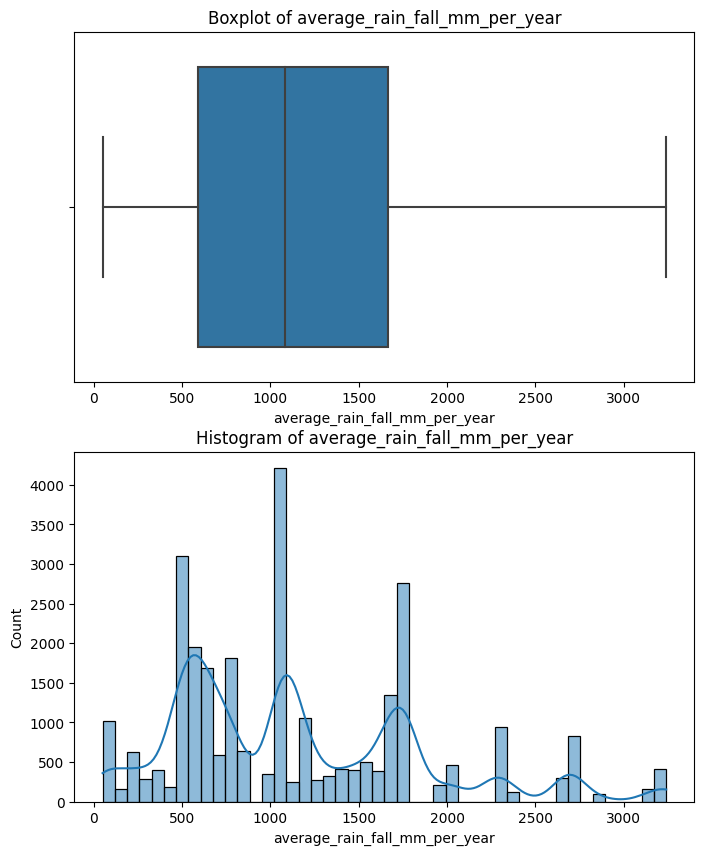

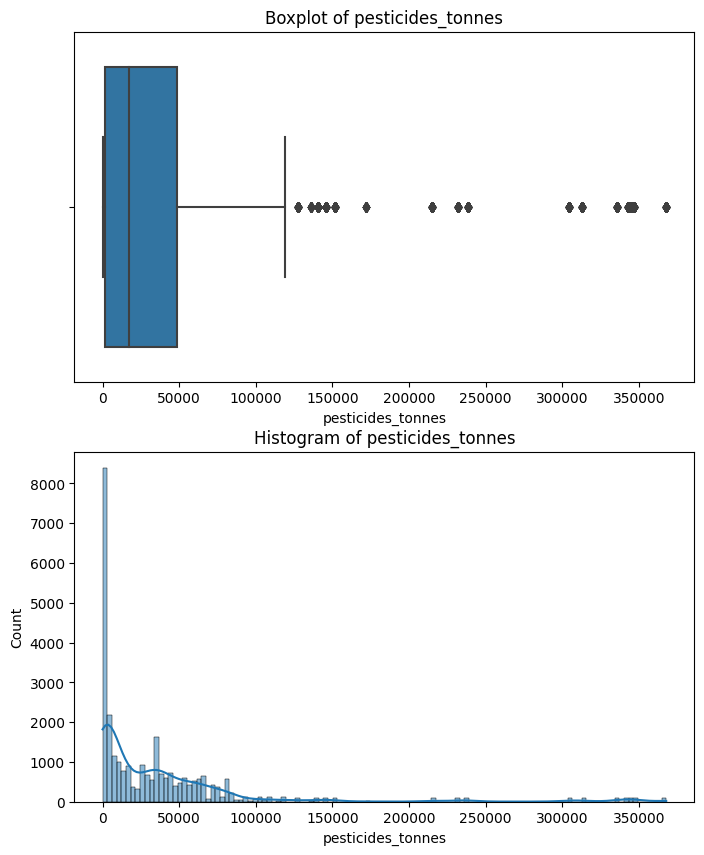

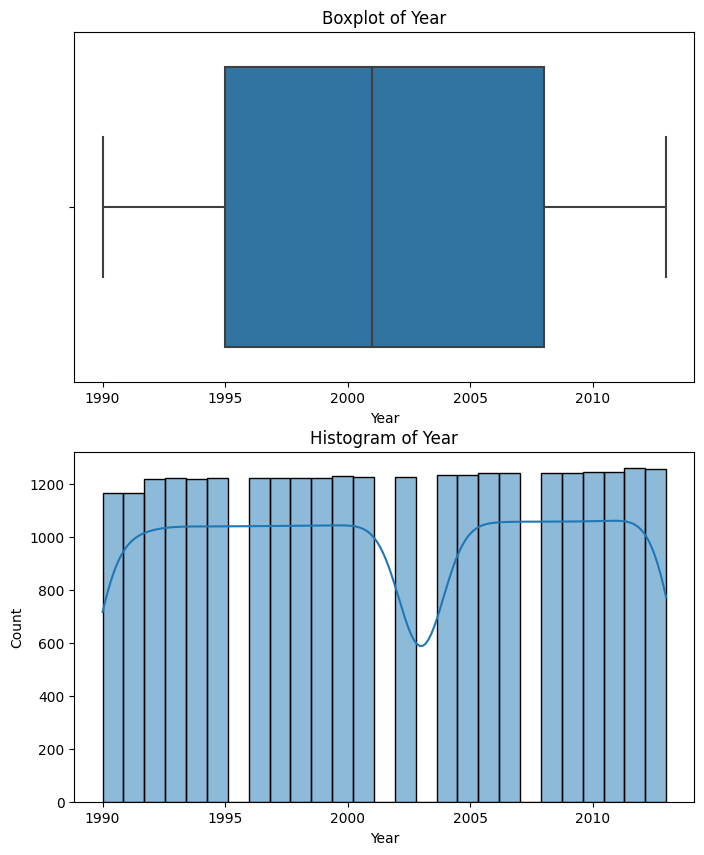

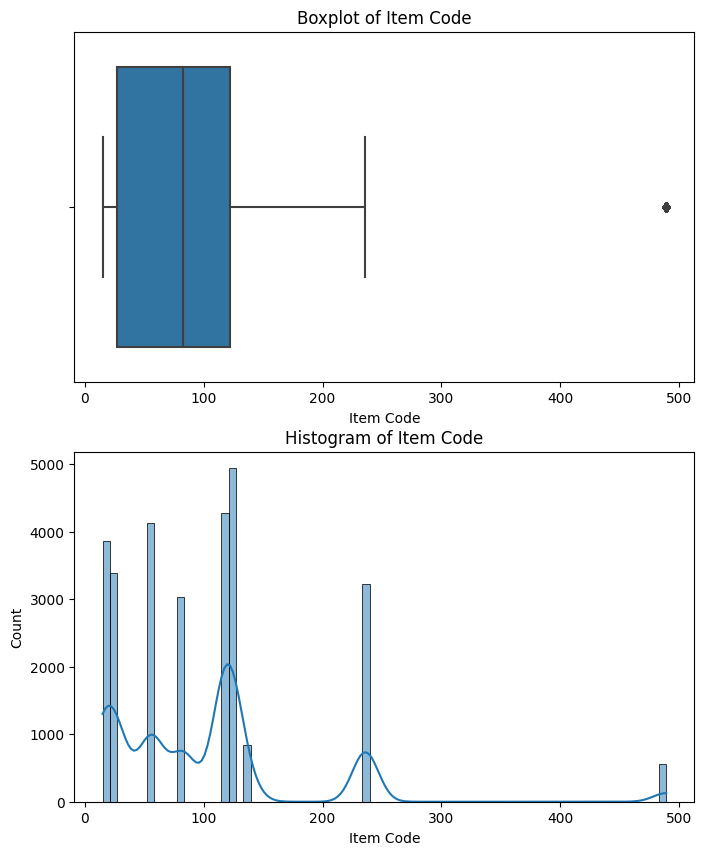

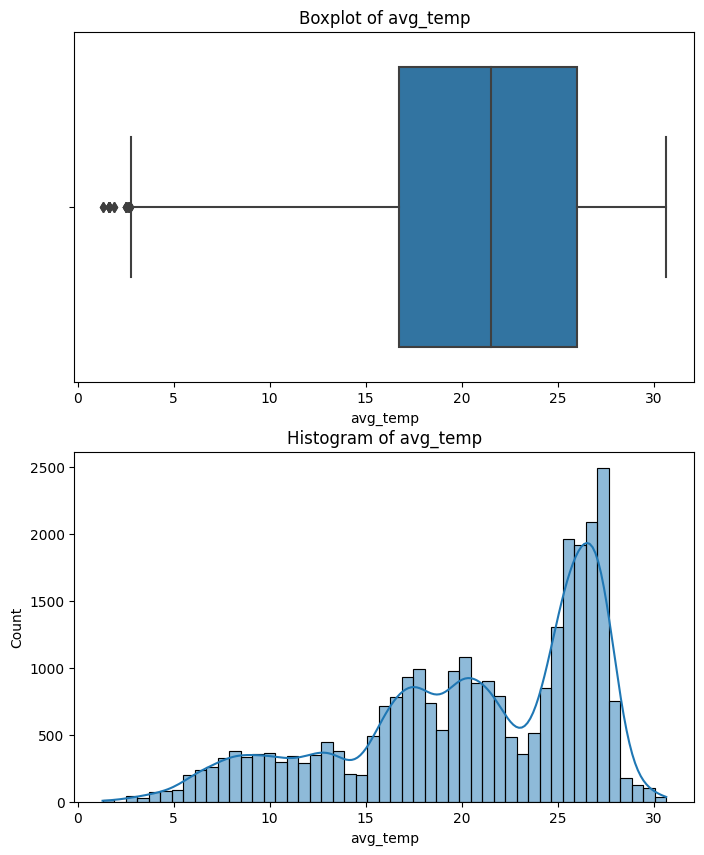

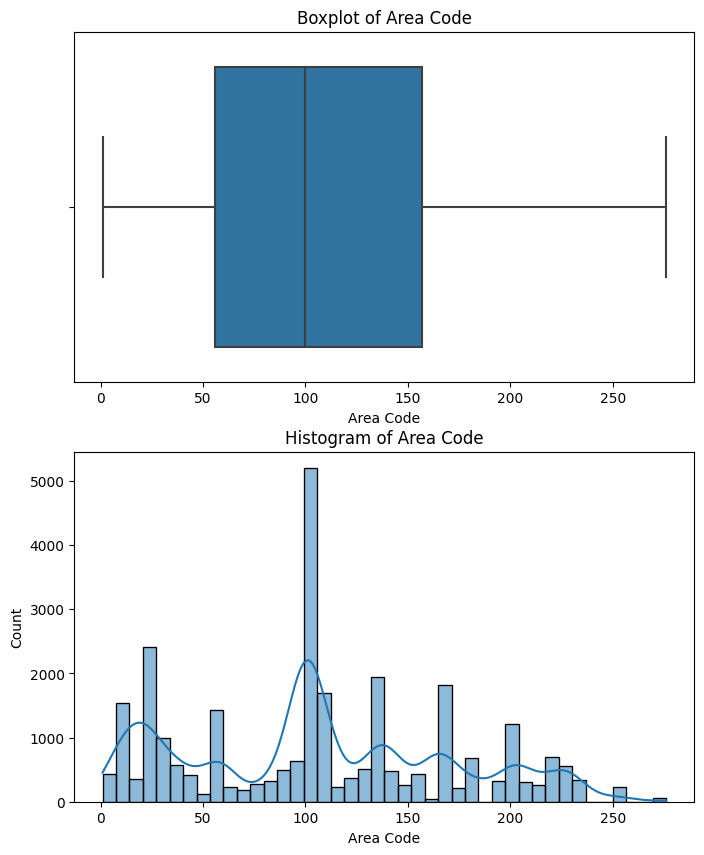

In [251]:
import seaborn as sn
# Define the columns to be analyzed
cols = ['hg/ha_Value', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'Year', 'Item Code', 'avg_temp', 'Area Code']

# Loop through the columns and create a boxplot and histogram for each
for col in cols:
    # Create a subplot with two plots on top of each other
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
    
    # Create a boxplot for the column
    sn.boxplot(x=merged_df[col], ax=ax1)
    ax1.set_title(f"Boxplot of {col}")
    
    # Create a histogram for the column
    sn.histplot(data=merged_df, x=col, kde=True, ax=ax2)
    ax2.set_title(f"Histogram of {col}")
    
    # Show the plots
    plt.show()

The boxplots show the distribution of data, including potential outliers, and histograms visualize the data's frequency distribution for each of the specified columns.

I can use the boxplots to identify the presence of outliers or extreme values in the dataset, while the histograms will help me understand the distribution of values, such as whether they are normally distributed, skewed, or exhibit other patterns.

Year (in an agrarian context):

The median year in the data set is approximately 2001.54. This implies that the data spans multiple years, demonstrating the temporal scope of agricultural data.
The moderate standard deviation of approximately 7.05 indicates that the years are near to the average year, with little variation from one year to the next.
Minimum, maximum: The data ranges from 1990 to 2013, indicating that it was compiled over a considerable time frame. This range permits the investigation of long-term trends in agricultural variables.

Utilization of Pesticides (Agricultural Context):
Mean pesticide use is approximately 37,069.14 tonnes on average. This is the average amount of pesticides used in agriculture.
Std: The relatively high standard deviation of approximately 59,954.79 indicates that pesticide use varies substantially across agricultural scenarios.
Minimum, maximum: The presence of exceptionally high values (e.g., a maximum of 367,778,00 tonnes) indicates that extensive pesticide application occurs in some instances, possibly due to specific crop types or pest management strategies.

precipitation (agricultural context):
The average annual precipitation is approximately 1,149.06 millimetres. This offers insight into the average precipitation levels in the territories included in the public data set.
Std: The standard deviation of approximately 709.81 indicates that annual and regional precipitation amounts vary substantially.
Minimum/Maximum: The data set contains a wide range of annual precipitation values, with the minimum being 51.00 mm and the maximum being 3,240.00 mm. This diversity in precipitation patterns can have significant effects on crop growth and irrigation requirements.

Temperature (Context of Agriculture):
The mean average temperature is approximately 20.54 degrees Celsius. This is the average temperature experienced in agricultural regions.
The approximately 6.31°C standard deviation indicates temperature variability, which can affect crop development and phenology.
Minimum, maximum: The dataset spans a wide spectrum of temperatures, from 1.30°C to 30.65°C. Temperature plays a crucial role in determining which commodities and seasons are suitable for cultivation.

Area Code (Context of Agriculture):
The mean area code in the dataset is approximately 107.26, reflecting the average geographic area or region code.
The approximately 64.99 standard deviation indicates variation in the assignment of area codes. Various area codes may correspond to distinct agricultural zones.
Minimum, maximum: The presence of area codes ranging from 1 to 276 indicates that the dataset encompasses disparate geographic regions. Different soil varieties, climates, and agricultural practices may exist in these regions.

Item Code (Context: agriculture):
The mean item code is 102.16, which represents the average code designated to various agricultural products or practices.
A standard deviation of approximately 84.84 indicates that item categorization is variable. Various agricultural products, such as produce or livestock, may be classified by distinct item codes.
Minimum, maximum: The range of item codes in the dataset, from 15 to 489, reflects the diversity of monitored agricultural products and practices.

Crop Yield (Context of Agriculture):
The average yield of a particular crop or commodities is approximately 77,047.86 hectograms per hectare (hg/ha).
With a standard deviation of approximately 84,950.19 hg/ha, crop yields are likely to vary widely. The variability of crop production can be affected by weather, soil quality, and agricultural practices.
Min/Max: The prevalence of extreme values, with a maximum yield of 501,412.00 hg/ha, highlights the potential for exceptionally high-yielding crops or specific agricultural interventions.


# Categorical variables

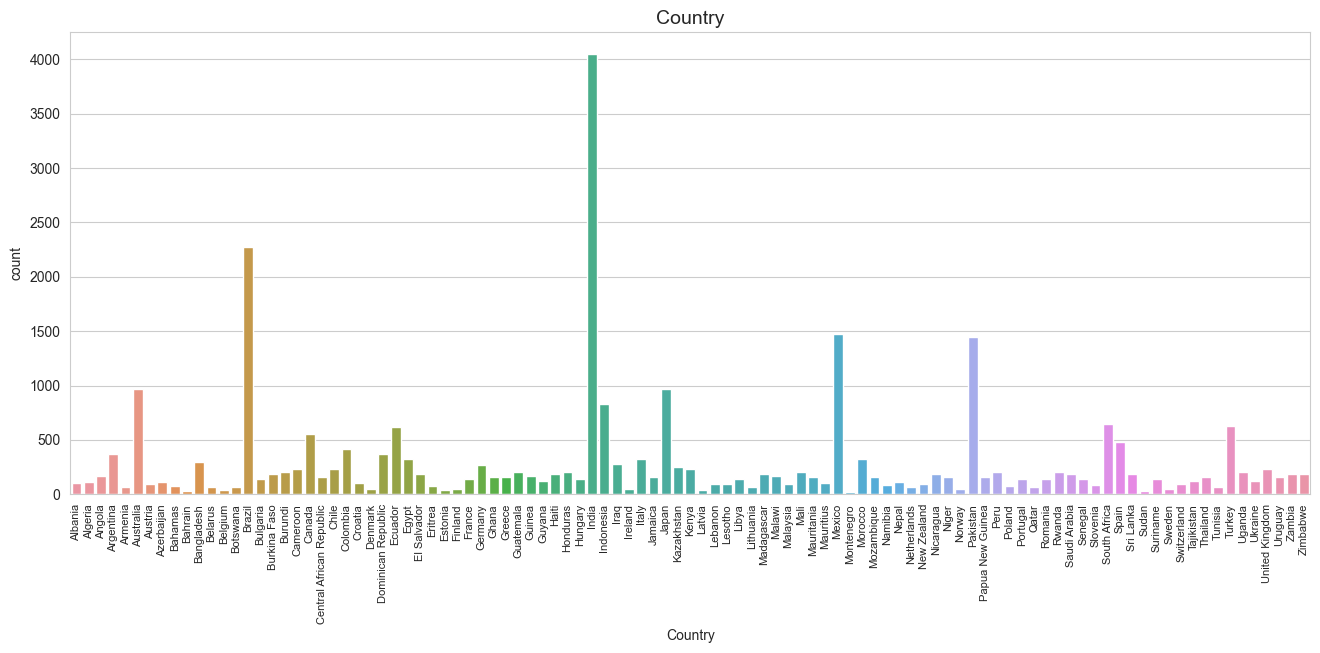

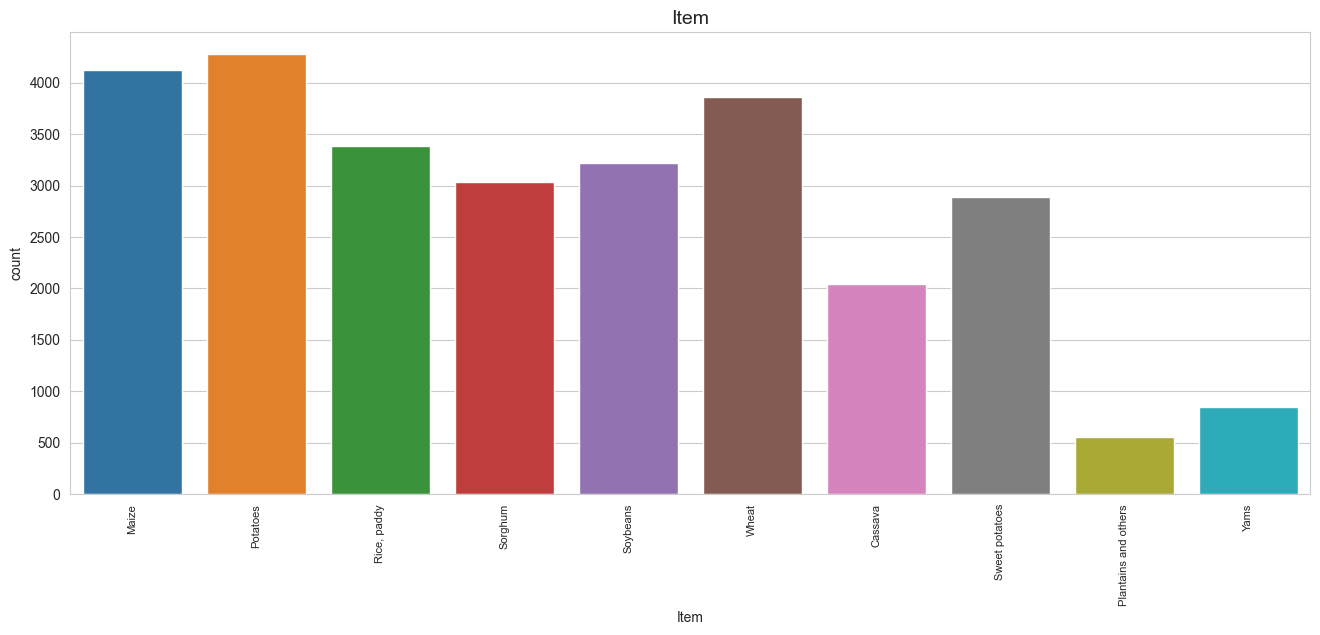

In [285]:
# Create a list of categorical columns
cat_cols = ['Country', 'Item']

# Loop over the categorical columns and create bar plots
for col in cat_cols:
    plt.figure(figsize=(16, 6))
    sn.countplot(x=col, data=merged_df)

    # Adjust font size for the x-axis labels
    plt.xticks(rotation=90, fontsize=8)

    # Adjust font size for the title
    plt.title(col, fontsize=14)

    plt.show()


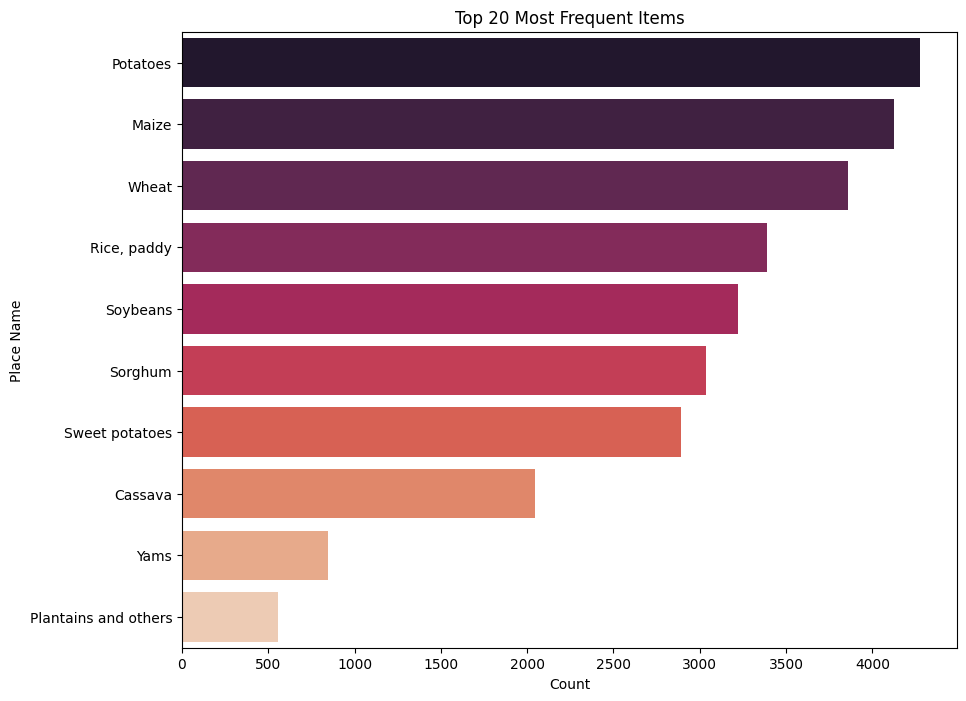

In [271]:
places = merged_df['Item'].value_counts().head(20)

# Create horizontal bar plot
plt.figure(figsize=(10,8))
sn.barplot(x=places.values, y=places.index, palette='rocket')
plt.title('Top 20 Most Frequent Items')
plt.xlabel('Count')
plt.ylabel('Place Name')
plt.show()

In [272]:
merged_df.select_dtypes(include='object').describe()

,Country,Element,Item
count,28248,28248,28248
unique,101,1,10
top,India,Yield,Potatoes
freq,4048,28248,4276


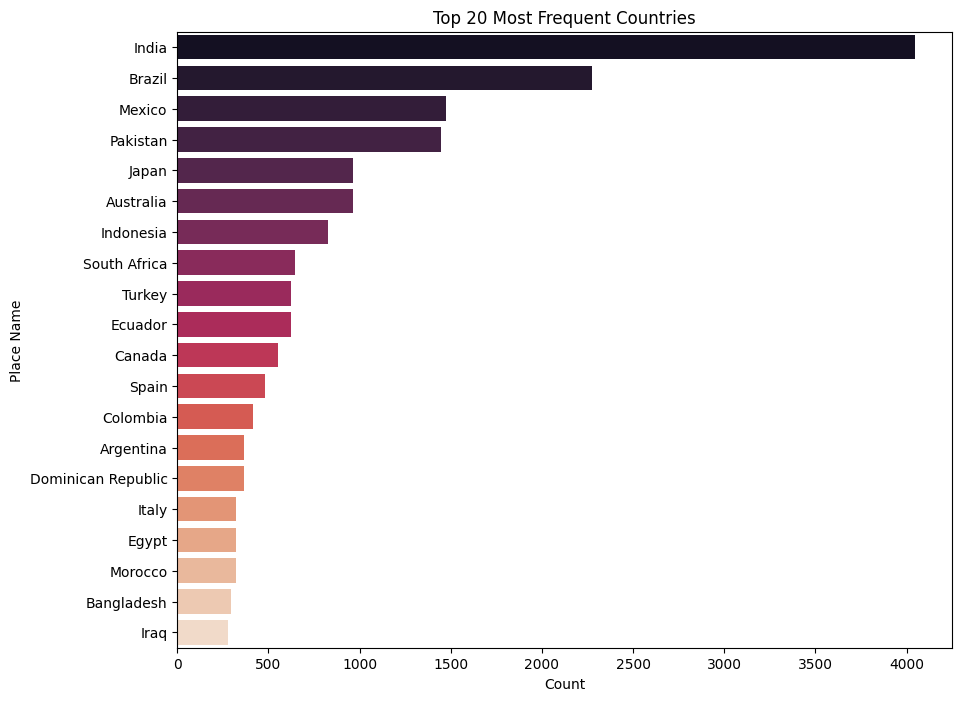

In [274]:
places = merged_df['Country'].value_counts().head(20)

# Create horizontal bar plot
plt.figure(figsize=(10,8))
sn.barplot(x=places.values, y=places.index, palette='rocket')
plt.title('Top 20 Most Frequent Countries')
plt.xlabel('Count')
plt.ylabel('Place Name')
plt.show()

These statistics provide insight on the categorical columns within this dataset. They reveal the variety of countries or regions represented, the consistency of the 'Element' variable, and the prevalence of particular agricultural items, such as 'Potatoes,' in the dataset. Understanding these characteristics is essential for further data analysis and interpretation within the agricultural context.

# Bivariate Analysis

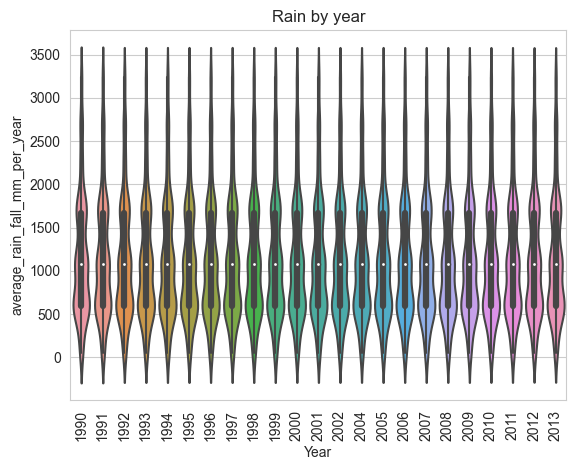

In [283]:
# Set the Seaborn style to "whitegrid" for a specific background style
sn.set_style("whitegrid")

# Create a violin plot to compare the distribution of prices for each property type
ax = sn.violinplot(x='Year', y='average_rain_fall_mm_per_year', data=merged_df)

# Rotate the x-axis labels by 90 degrees for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set the plot title and axis labels
plt.title("Rain by year")  # Title for the plot
plt.xlabel("Year")         # Label for the x-axis
plt.ylabel("average_rain_fall_mm_per_year")  # Label for the y-axis

# Show the plot
plt.show()


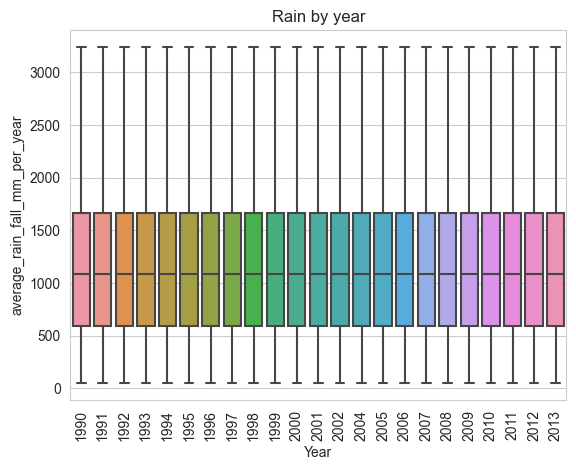

In [284]:
# Create a boxplot to compare the distribution of average rainfall for each year
sn.boxplot(x='Year', y='average_rain_fall_mm_per_year', data=merged_df)

# Rotate the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Set the plot title and axis labels
plt.title("Rain by year")  # Title for the plot
plt.xlabel("Year")         # Label for the x-axis
plt.ylabel("average_rain_fall_mm_per_year")  # Label for the y-axis

# Show the plot
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


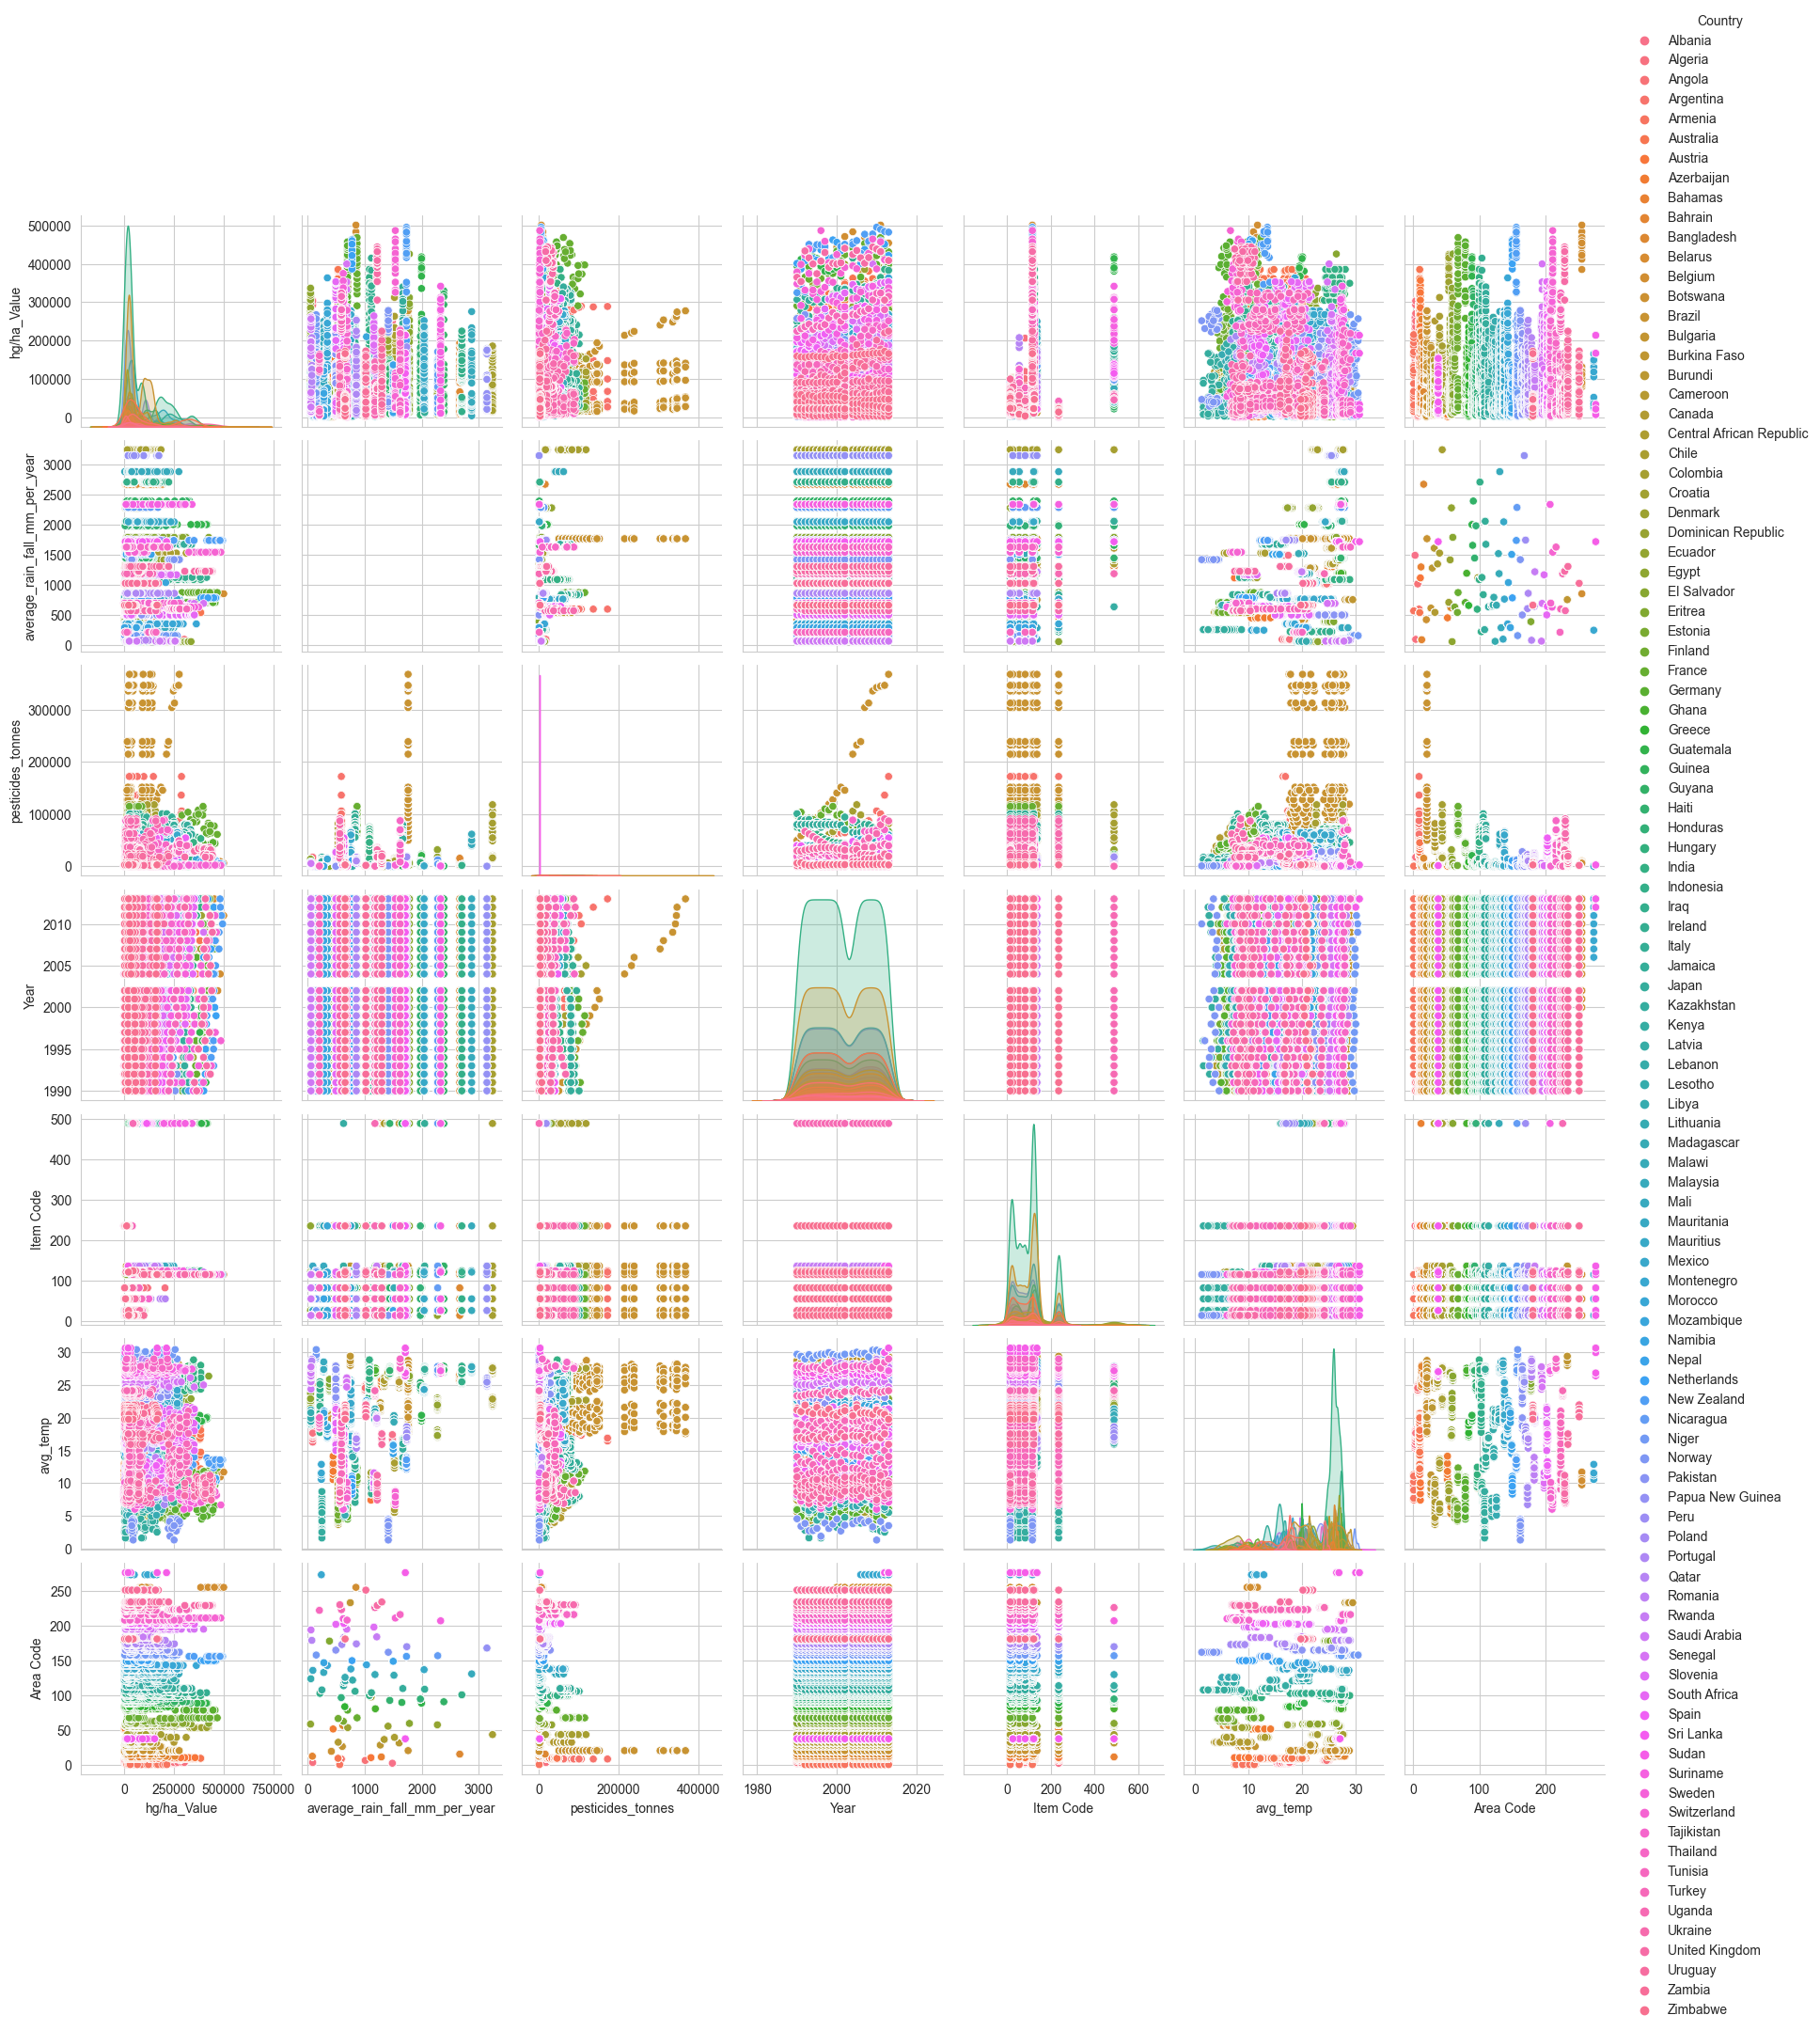

In [286]:
import seaborn as sn

# Define the columns for analysis
quantitative_cols = ['hg/ha_Value', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'Year', 'Item Code', 'avg_temp', 'Area Code']
categorical_cols = ['Country', 'Item', 'Element']

# Create a pair plot with color differentiation based on categorical variables
sn.pairplot(data=merged_df, vars=quantitative_cols, hue=categorical_cols[0], diag_kind='kde')

# Show the plot
plt.show()


## Scatter Plots (Quantitative vs. Quantitative):

Scatter plots show the relationship between pairs of quantitative variables.
Look for patterns such as linear relationships, clusters, or outliers.
For example, if you see a strong positive (upward-sloping) trend between 'hg/ha_Value' (crop yield) and 'avg_temp' (average temperature), you can infer that higher temperatures may be associated with higher crop yields.

## Histograms (Quantitative vs. Quantitative, Diagonal Elements):

Histograms on the diagonal represent the distribution of individual quantitative variables.
Pay attention to the shape of these distributions, as it can indicate whether the data is normally distributed, skewed, or has multiple peaks.
Skewed distributions may suggest the presence of outliers or non-uniform patterns.

## Box Plots (Quantitative vs. Categorical):

Box plots show the distribution of a quantitative variable across different categories within a categorical variable.
Examine differences in the central tendency (median) and variability (interquartile range) across categories.
If you see notable differences in box plot shapes or positions, it suggests that the categorical variable has an impact on the quantitative variable.

## Kernel Density Estimation (KDE) Plots (Quantitative vs. Quantitative, Diagonal Elements):

KDE plots on the diagonal represent smoothed versions of the histograms.
These plots provide a continuous estimate of the data distribution.
Look for patterns in the KDE plots, such as multiple modes or asymmetry.

## Color Differentiation (Categorical Variables):

If you've used color to differentiate data points based on categorical variables (e.g., 'Country'), observe how data points from different categories are distributed.
Check whether there are distinct clusters or patterns for different categories.

## Correlation (Quantitative vs. Quantitative, Numerical Values):

The numerical values on the plots represent the correlation coefficients between pairs of quantitative variables.
Positive values indicate positive correlations, negative values indicate negative correlations, and values close to zero suggest little or no correlation.
Strong correlations may imply a relationship between variables.

## Outliers (Unusual Data Points):

Pay attention to any data points that appear as outliers, especially in scatter plots.
Outliers can provide valuable insights and may warrant further investigation.
Overall Patterns:

Consider the overall visual patterns in the pair plot.
Are there consistent trends or relationships across multiple plots?